<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_3_%D0%97%D0%B0%D0%B2%D0%B4_1_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛАБОРАТОРНА РОБОТА 3. Машинне навчання

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

dts = pd.read_csv(url, delim_whitespace=True)
# 1. Вивести перших 5 рядків.
dts.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
# 2. Перевірити наявність пропусків.
dts.isnull().sum()

,0
AGE,0
SEX,0
BMI,0
BP,0
S1,0
S2,0
S3,0
S4,0
S5,0
S6,0


In [4]:
dts.duplicated().sum()

0

In [5]:
#4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
#унікальні значення.
dts['SEX'].unique()

array([2, 1])

In [6]:
# Типи даних
dts.dtypes

,0
AGE,int64
SEX,int64
BMI,float64
BP,float64
S1,int64
S2,float64
S3,float64
S4,float64
S5,float64
S6,int64


Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64


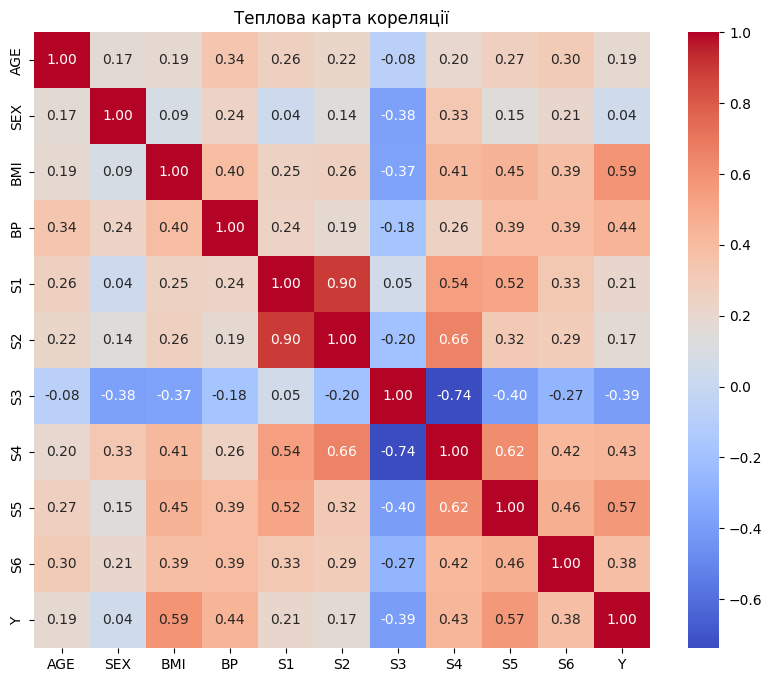

In [8]:
#6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
#Розташувати в порядку спадання.
#Побудувати теплову карту кореляції.
import matplotlib.pyplot as plt

# Обчислити кореляцію
correlation_matrix = dts.corr()

# Відсортувати кореляцію за спаданням
correlation_with_target = correlation_matrix['Y'].sort_values(ascending=False)
print(correlation_with_target)

# Побудувати теплову карту кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Теплова карта кореляції')
plt.show()

In [9]:
# 7. Масштабувати ознаки.
from sklearn.preprocessing import StandardScaler

# Вибір стовпців для масштабування
features = dts.drop(columns=['Y'])  # Всі стовпці, окрім цільового
scaler = StandardScaler()

# Масштабування ознак
scaled_features = scaler.fit_transform(features)

# Створення нового DataFrame з масштабованими ознаками
scaled_dts = pd.DataFrame(scaled_features, columns=features.columns)

# Додати цільовий стовпець назад
scaled_dts['Y'] = dts['Y'].values

print(scaled_dts.head())

        AGE       SEX       BMI        BP        S1        S2        S3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         S4        S5        S6    Y  
0 -0.054499  0.418531 -0.370989  151  
1 -0.830301 -1.436589 -1.938479   75  
2 -0.054499  0.060156 -0.545154  141  
3  0.721302  0.476983 -0.196823  206  
4 -0.054499 -0.672502 -0.980568  135  


In [10]:
# 8. Поділити дані на тренувальну і тестову вибірки.
from sklearn.model_selection import train_test_split

# Вибір стовпців
X = scaled_dts.drop(columns=['Y'])  # Ознаки
y = scaled_dts['Y']                   # Цільова змінна

# Поділ на тренувальну (80%) і тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вивести розміри вибірок
print(f'Розмір тренувальної вибірки: {X_train.shape[0]} рядків')
print(f'Розмір тестової вибірки: {X_test.shape[0]} рядків')


Розмір тренувальної вибірки: 353 рядків
Розмір тестової вибірки: 89 рядків


In [12]:
# Обчислення кореляції
correlation_matrix = scaled_dts.corr()
correlation_with_target = correlation_matrix['Y'].abs().sort_values(ascending=False)
print(correlation_with_target)


Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S3     0.394789
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
Name: Y, dtype: float64


In [13]:
# Вибір топ-5 корелюючих ознак
top_features = correlation_with_target.index[1:6]
X_top = X_train[top_features]
X_test_top = X_test[top_features]


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Вибір корелюючих ознак
# Виберіть стовпці на основі кореляції, наприклад:
correlation = dts.corr()['Y'].abs().sort_values(ascending=False)
# Виберемо, скажімо, 5 найбільш корелюючих ознак
top_features = correlation.index[1:6]  # Ігноруємо 'target'

# Підготовка даних для моделі
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Модель лінійної регресії
linear_model = LinearRegression()
linear_model.fit(X_train_top, y_train)
y_pred_linear = linear_model.predict(X_test_top)

# Модель Random Forest регресії
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_top, y_train)
y_pred_rf = rf_model.predict(X_test_top)

# Оцінка моделей
# Лінійна регресія
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Random Forest регресія
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Виведення результатів
print("Лінійна регресія:")
print(f"Середньоквадратична помилка: {linear_mse:.2f}")
print(f"Коефіцієнт детермінації R^2: {linear_r2:.2f}\n")

print("Random Forest регресія:")
print(f"Середньоквадратична помилка: {rf_mse:.2f}")
print(f"Коефіцієнт детермінації R^2: {rf_r2:.2f}")



Лінійна регресія:
Середньоквадратична помилка: 2936.48
Коефіцієнт детермінації R^2: 0.45

Random Forest регресія:
Середньоквадратична помилка: 3067.57
Коефіцієнт детермінації R^2: 0.42


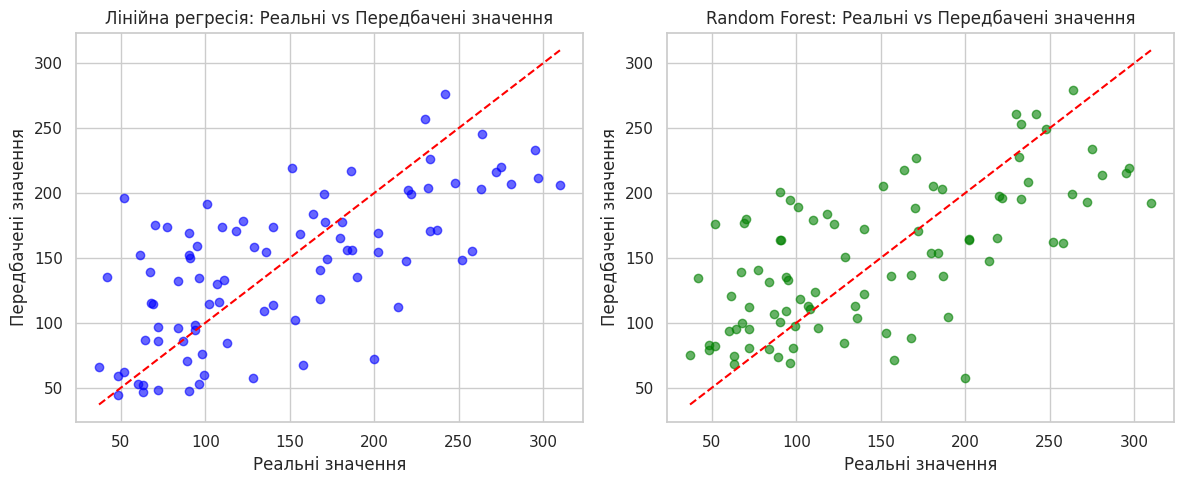

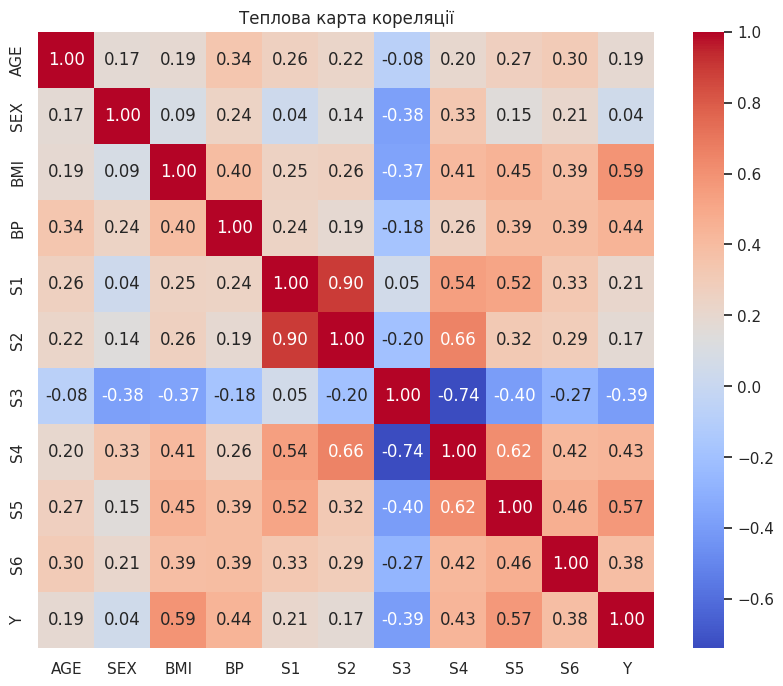

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування стилю графіків
sns.set(style="whitegrid")

# Графік реальних значень vs передбачених для лінійної регресії
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Лінійна регресія: Реальні vs Передбачені значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')

# Графік реальних значень vs передбачених для Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: Реальні vs Передбачені значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')

plt.tight_layout()
plt.show()

# Теплова карта кореляції
plt.figure(figsize=(10, 8))
correlation_matrix = dts.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Теплова карта кореляції')
plt.show()
